# Task 1: Perform an Exploratory Data Analysis on a Given Dataset (5 marks)

## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os
from pycaret.classification import *
import mlflow
from flask import Flask, request, render_template
from pycaret.classification import load_model, predict_model

In [2]:
# Load the dataset
file_path = 'data/02_mushroom_species_data.csv'
df = pd.read_csv(file_path)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df = df.dropna(subset=['habitat'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7932 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     7932 non-null   object
 1   cap-shape                 7932 non-null   object
 2   cap-surface               7932 non-null   object
 3   cap-color                 7932 non-null   object
 4   bruises                   7932 non-null   object
 5   odor                      7932 non-null   object
 6   gill-attachment           7932 non-null   object
 7   gill-spacing              7932 non-null   object
 8   gill-size                 7932 non-null   object
 9   gill-color                7932 non-null   object
 10  stalk-shape               7932 non-null   object
 11  stalk-root                7932 non-null   object
 12  stalk-surface-above-ring  7932 non-null   object
 13  stalk-surface-below-ring  7932 non-null   object
 14  stalk-color-above-ring    793

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,7932,7932,7932,7932,7932,7932,7932,7932,7932,7932,7932,7932,7932,7932,7932,7932,7932,7932,7932,7932,7932,7932,7932
unique,2,6,4,10,2,9,2,2,2,11,2,4,4,4,8,8,1,4,3,5,9,6,6
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,tapering,bulbous,smooth,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4016,3592,3148,2236,4748,3336,7722,6620,5420,1728,4608,6064,4984,4744,4368,4288,7932,7732,7488,3968,2196,4040,3148


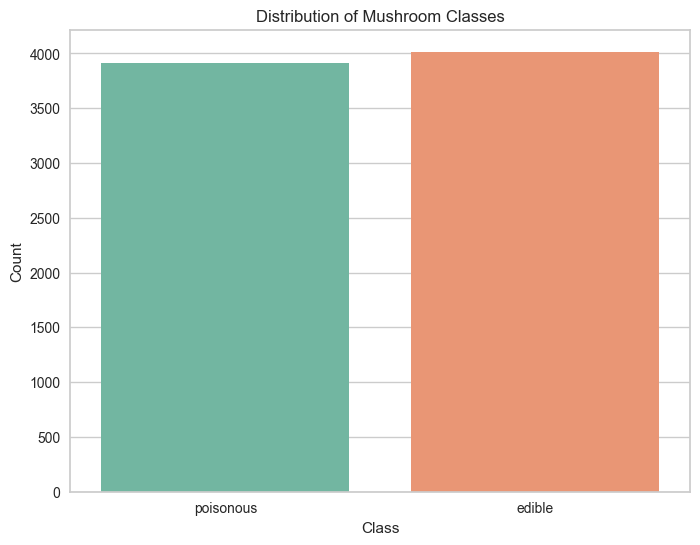

In [7]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='class', palette='Set2')
plt.title('Distribution of Mushroom Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

The bar chart shows the distribution of mushroom classes in the dataset, with two categories: "poisonous" and "edible." The chart reveals that the dataset is relatively balanced, with a slightly higher number of edible mushrooms compared to poisonous ones. There are approximately 4,000 edible mushrooms and slightly fewer than 4,000 poisonous mushrooms. 

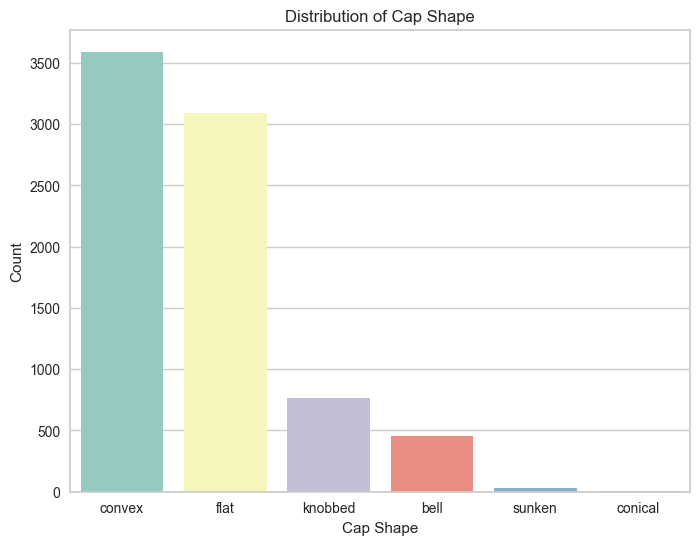

In [8]:
# Sort the cap-shape categories by their count
cap_shape_order = df['cap-shape'].value_counts().index

# Plot the distribution of cap-shape sorted by count
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='cap-shape', order=cap_shape_order, palette='Set3')
plt.title('Distribution of Cap Shape')
plt.xlabel('Cap Shape')
plt.ylabel('Count')
plt.show()

The bar chart illustrates the distribution of different cap shapes among mushrooms in the dataset. The most common cap shape is "convex," with around 3,500 occurrences, followed by "flat," which appears slightly less frequently, with about 3,000 instances. The "knobbed" and "bell" shapes are less common, with fewer than 1,000 occurrences each. The "sunken" and "conical" shapes are the rarest, appearing very infrequently in the dataset. This distribution suggests that the convex and flat cap shapes dominate the dataset, while other shapes are relatively rare. 

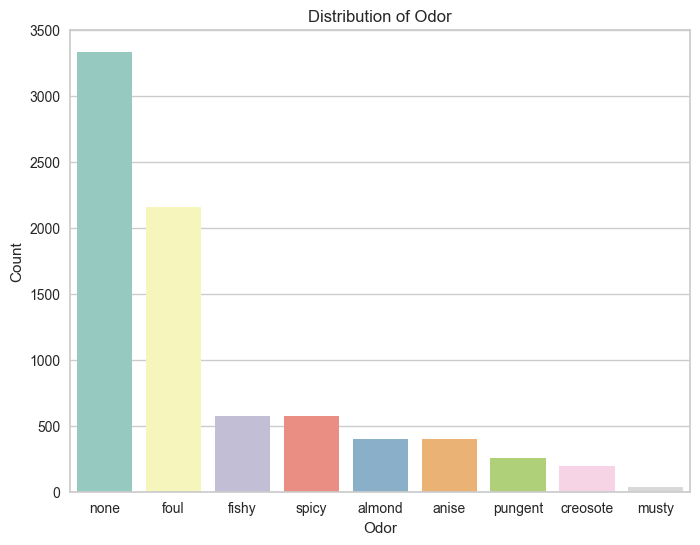

In [9]:
# Sort the odor categories by their count
odor_order = df['odor'].value_counts().index

# Plot the distribution of odor sorted by count
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='odor', order=odor_order, palette='Set3')
plt.title('Distribution of Odor')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.show()

The bar chart illustrates the distribution of different odors among mushrooms in the dataset. The majority of mushrooms have no detectable odor, as indicated by the "none" category, which dominates the chart with around 3,500 instances. The second most common odor is "foul," with approximately 2,000 occurrences. The other odor types, such as "fishy," "spicy," "almond," "anise," "pungent," "creosote," and "musty," are much less common, each having fewer than 500 occurrences. This distribution shows a significant concentration of mushrooms with no odor, while the presence of other odors is relatively rare.

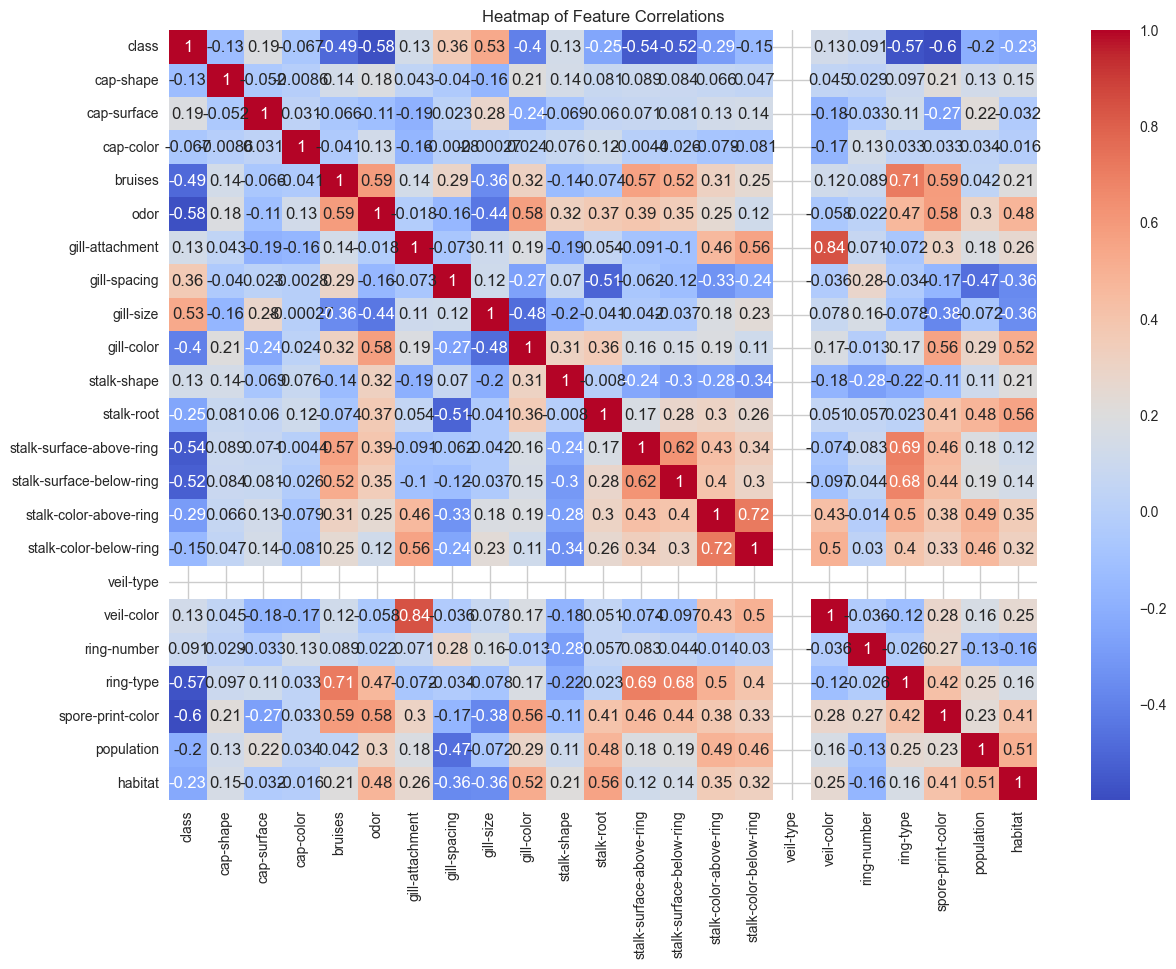

In [10]:
# Create a heatmap of the correlations between categorical features
plt.figure(figsize=(14, 10))
sns.heatmap(df.apply(lambda x: pd.factorize(x)[0]).corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()



The heatmap displays the correlations between various features in the mushroom dataset. Each cell in the heatmap represents the correlation coefficient between two features, with positive correlations shown in red and negative correlations in blue. Strong positive correlations are observed between certain pairs of features, such as "veil-type" and "veil-color," as well as "stalk-surface-above-ring" and "stalk-surface-below-ring," indicating that these features tend to increase together. Conversely, strong negative correlations are seen between features like "gill-size" and "gill-spacing," where one tends to decrease as the other increases. The feature "class" (edible or poisonous) shows moderate correlations with several features, such as "gill-size" and "odor," suggesting these may be influential factors in determining the class of a mushroom. 

# Task 2: Train, validate and develop a Machine Learning pipeline using PyCaret. (10 marks)

In [11]:
from pycaret.classification import *

# Specify the categorical features explicitly, excluding the target column
categorical_features = df.columns.drop('class').tolist()

# Initialize the PyCaret environment
clf1 = setup(data=df, 
             target='class', 
             categorical_features=categorical_features, 
             session_id=123)

# Train multiple models using k-fold cross-validation
best_model = compare_models()


,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Target mapping,"edible: 0, poisonous: 1"
4,Original data shape,"(7932, 23)"
5,Transformed data shape,"(7932, 108)"
6,Transformed train set shape,"(5552, 108)"
7,Transformed test set shape,"(2380, 108)"
8,Categorical features,22
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3770
qda,Quadratic Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2280
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5500
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3720
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3110
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.7450
dt,Decision Tree Classifier,0.9998,0.9998,0.9998,0.9998,0.9998,0.9996,0.9996,0.2280
svm,SVM - Linear Kernel,0.9998,1.0000,0.9998,0.9998,0.9998,0.9996,0.9996,0.2200
catboost,CatBoost Classifier,0.9998,1.0000,0.9998,0.9998,0.9998,0.9996,0.9996,1.7220
knn,K Neighbors Classifier,0.9996,1.0000,0.9996,0.9996,0.9996,0.9993,0.9993,1.5560


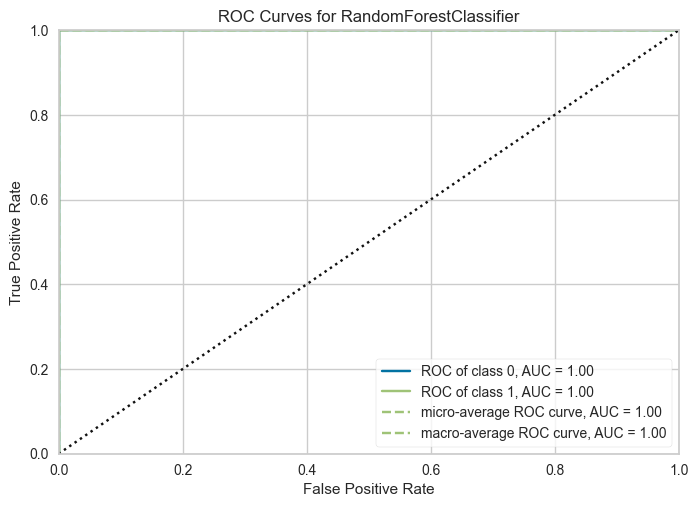

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [12]:
# Analyze the performance of the trained model on the test set
plot_model(best_model, plot='auc')
evaluate_model(best_model)

In [13]:
# Finalize the best model
final_model = finalize_model(best_model)
# Predict resale prices on new data (you can use a test dataset or the same dataset)
predictions = predict_model(final_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [14]:
from pycaret.classification import save_model

# Assuming your model is named 'final_model'
save_model(final_model, 'models/mushroom_classification_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
 

In [15]:
# load pipeline
loaded_best_pipeline = load_model('models/mushroom_classification_model')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\USER\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              m...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=123, verbose=0,
                                        warm_start=False))],
         verbose=False)